In [1]:
pwd


'C:\\Users\\Asus\\new1\\titanic'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train_path='C:\\Users\\Asus\\new1\\titanic/train.csv'
test_path='C:\\Users\\Asus\\new1\\titanic/test.csv'

# **Import the data**

In [5]:
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)

# **Load the data**

In [6]:
train.shape

(891, 12)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Null Values**

In [9]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

**So, we can see that almost 62% passengers died in the training set**

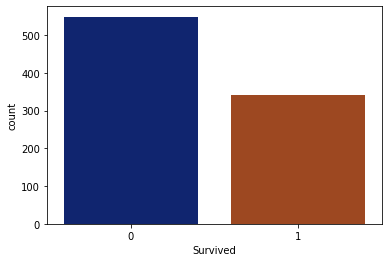

In [12]:
sns.countplot(x="Survived",data=train,palette="dark")

**Let's see what percentage of people died and survived considering the Pclass**

In [13]:
train["Survived"].groupby(train["Pclass"]).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

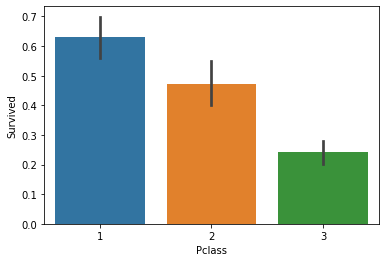

In [14]:
sns.barplot(x="Pclass",y="Survived",data=train)

**It is visible that the percentage of survival is maximum for Class 1 and least for class 3.**

# **Title**

In [15]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=True)
train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Capt          1
Countess      1
Don           1
Lady          1
Sir           1
Ms            1
Mme           1
Name: Title, dtype: int64

In [16]:
train['Survived'].groupby(train['Title']).mean()

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

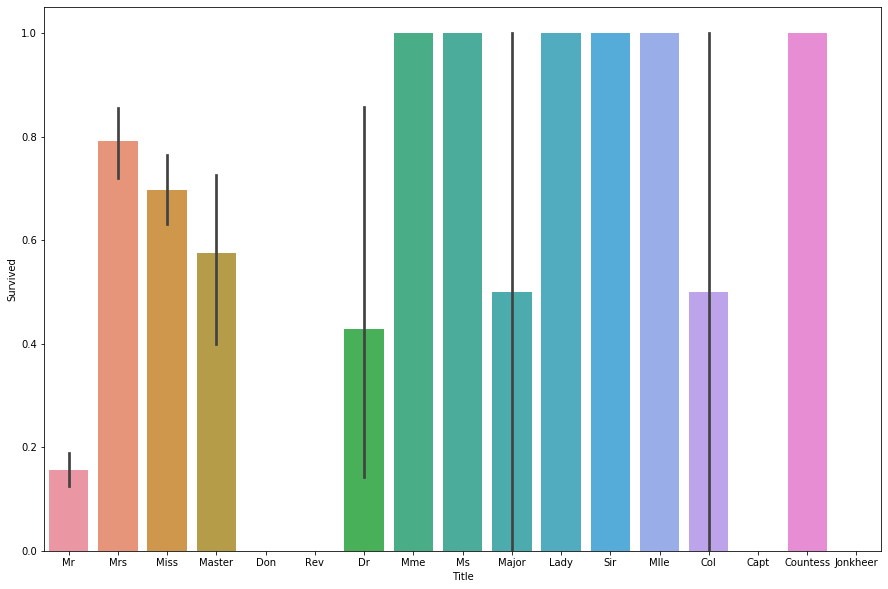

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(x='Title', y='Survived', data=train)

# **Let's work with the length of the names**

In [18]:
train["Name_len"]=train["Name"].apply(lambda x : len(x))
train.Name_len.unique()

array([23, 51, 22, 44, 24, 16, 30, 49, 35, 31, 27, 36, 32, 20, 28, 55, 21,
       29, 57, 19, 46, 34, 56, 40, 17, 25, 45, 26, 50, 13, 15, 33, 18, 52,
       47, 38, 37, 41, 14, 42, 39, 82, 48, 54, 43, 67, 65, 53, 61, 12],
      dtype=int64)

In [19]:
train["Survived"].groupby(pd.qcut(train["Name_len"],5)).value_counts()

Name_len        Survived
(11.999, 19.0]  0           159
                1            45
(19.0, 23.0]    0           109
                1            47
(23.0, 27.0]    0           134
                1            63
(27.0, 32.0]    0            92
                1            73
(32.0, 82.0]    1           114
                0            55
Name: Survived, dtype: int64

**It can be said that there is a corelation between name length and suvival.**


# **Let's work with the column Sex**

In [20]:
train.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

**This shows that the survival rate of males is more than that of the females**

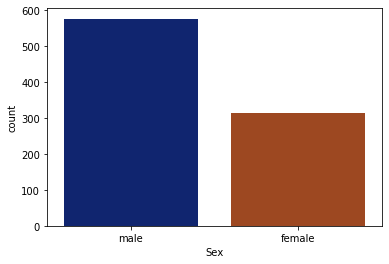

In [21]:
sns.countplot(x="Sex",data=train,palette="dark")

**So, almost 65% passengers were male, now we will see their survival percentage**

In [22]:
train["Survived"].groupby(train["Sex"]).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

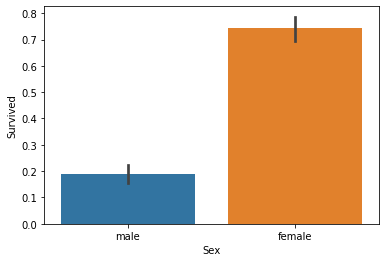

In [23]:
sns.barplot(x="Sex",y="Survived",data=train)

**The survival rate of females is much more than the males.**

In [24]:
train["Survived"].groupby(pd.qcut(train["Age"],8)).mean()

Age
(0.419, 16.0]     0.550000
(16.0, 20.125]    0.341772
(20.125, 24.0]    0.367347
(24.0, 28.0]      0.352941
(28.0, 32.312]    0.416667
(32.312, 38.0]    0.450549
(38.0, 47.0]      0.329545
(47.0, 80.0]      0.415730
Name: Survived, dtype: float64

In [25]:
pd.qcut(train["Age"],8).value_counts()

(0.419, 16.0]     100
(20.125, 24.0]     98
(32.312, 38.0]     91
(47.0, 80.0]       89
(38.0, 47.0]       88
(24.0, 28.0]       85
(28.0, 32.312]     84
(16.0, 20.125]     79
Name: Age, dtype: int64

**It visible that the relation between Age and Survival is negative, that is with the increase in age the survival percentage decreases.**

# SibSp

In [26]:
train["SibSp"].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

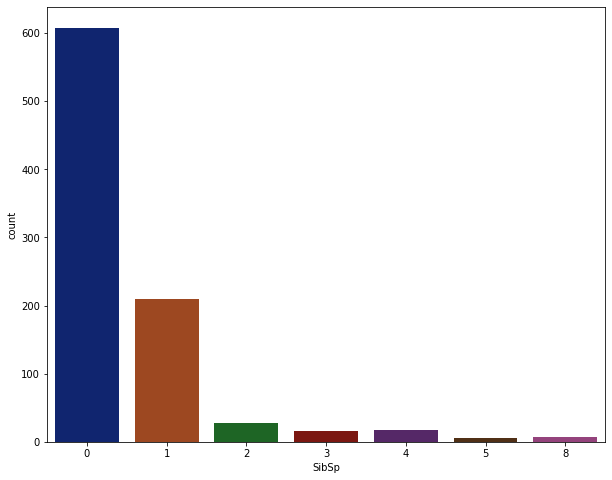

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x="SibSp",data=train,palette="dark")

In [28]:
train["Survived"].groupby(train["SibSp"]).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

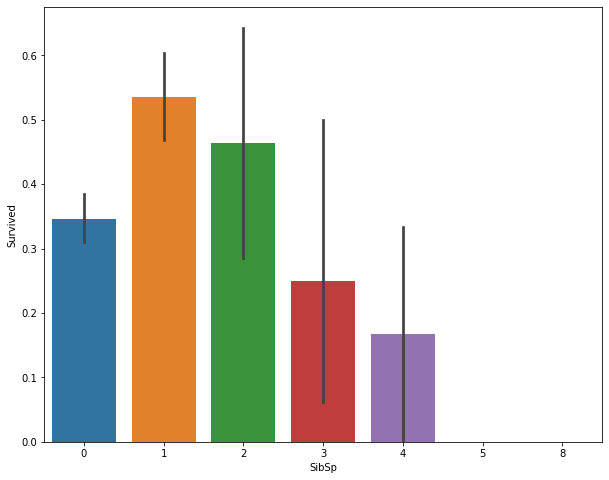

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(x="SibSp",y="Survived",data=train)

# Parch

In [30]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

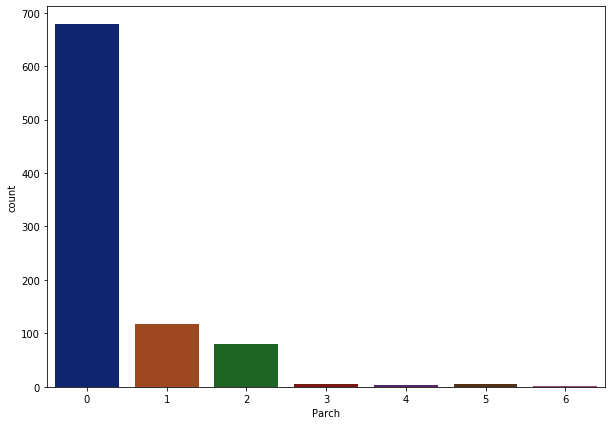

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(x="Parch",data=train,palette="dark")

In [32]:
train["Survived"].groupby(train["Parch"]).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

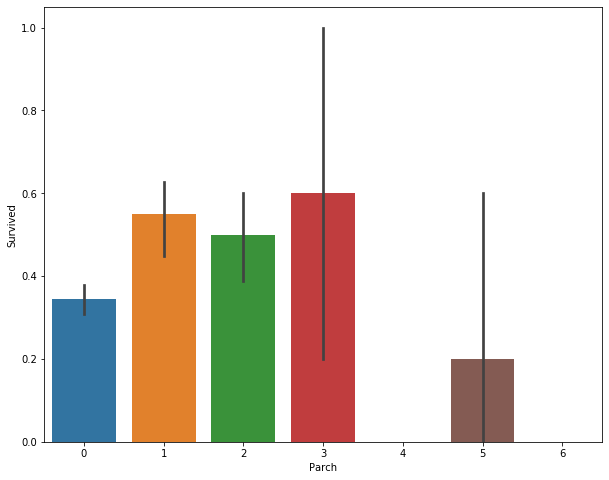

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x="Parch",y="Survived",data=train)

In [34]:
pd.qcut(train["Fare"],5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [35]:
train["Survived"].groupby(pd.qcut(train["Fare"],5)).mean()

Fare
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64

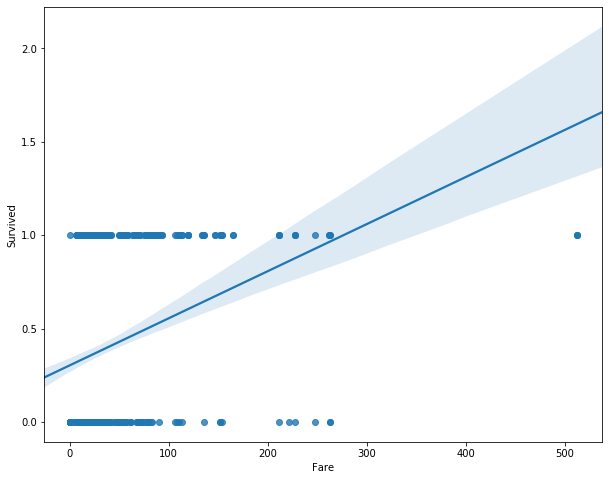

In [36]:
plt.figure(figsize=(10,8))
sns.regplot(x=train["Fare"],y=train["Survived"])

**So, it is visible that with higher Fare charges the chances of survival is more.**

In [37]:
pd.crosstab(pd.qcut(train["Fare"],8),columns=train["Pclass"])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.75]",6,6,128
"(7.75, 7.91]",0,0,83
"(7.91, 9.841]",0,0,111
"(9.841, 14.454]",0,86,27
"(14.454, 24.479]",0,24,86
"(24.479, 31.0]",51,46,15
"(31.0, 69.488]",59,17,34
"(69.488, 512.329]",100,5,7


**Fare is aslo corelated with Pclass**


# Now, Let's work with Cabin

In [38]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

**As there are so many types of cabin, so we will group the cabins in alphabetical order and we will make one more columne named Cabin_group**

In [39]:
train["Cabin_group"]=train["Cabin"].apply(lambda x : str(x)[0])
train["Cabin_group"].value_counts(normalize=True)

n    0.771044
C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: Cabin_group, dtype: float64

In [40]:
train["Survived"].groupby(train["Cabin_group"]).mean()

Cabin_group
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

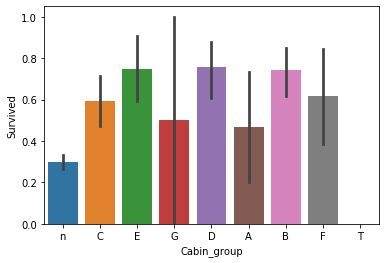

In [41]:
sns.barplot(x="Cabin_group",y="Survived",data=train)

**It seems there is no such relation between Cabin and Survived columns**

# Now, let's move on to Embarked

In [42]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

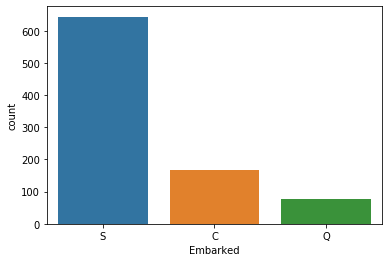

In [43]:
sns.countplot(x="Embarked",data=train)

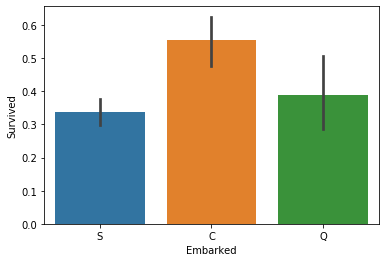

In [44]:
sns.barplot(x=train["Embarked"],y=train["Survived"])

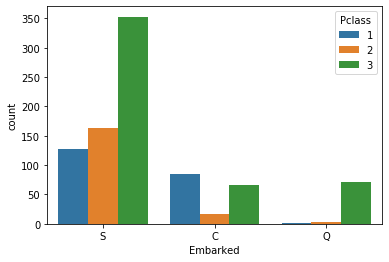

In [45]:
sns.countplot(x="Embarked",hue="Pclass",data=train)

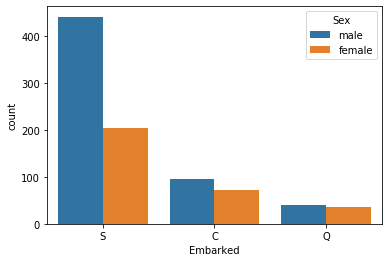

In [46]:
 sns.countplot(x='Embarked', hue='Sex', data=train)


# **Feauture Engineering**

# **Name**

In [47]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

# **Age**

In [48]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

# **SibSp/Parch**

In [49]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Alone',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Small', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

# **Ticket**

In [50]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

# **Cabin**

In [51]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Lett'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [52]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test


# **Embarked**

In [53]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
train['Embarked'].fillna('S', inplace=True)

In [55]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [56]:
train[(train.Pclass==3) & (train.Age>50)].Fare.median()

7.75

In [57]:
test['Fare'].fillna(7.75, inplace=True)

# **Encoding**

In [58]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Lett', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [59]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

# *****

In [60]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = fam_size(train, test)
train, test = ticket_grouped(train, test)
train['Embarked'].fillna('S', inplace=True)
test['Fare'].fillna(7.75, inplace=True)

train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                'Cabin_Lett', 'Title', 'Fam_Size'])
train, test = drop(train, test)

In [61]:
print(len(train.columns))

45


In [62]:
train.head()

,Survived,Age,Fare,Name_Len,Age_Null_Flag,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Ticket_Len,Pclass_3,...,Title_Mrs.,Title_Miss.,Title_Master.,Title_Rev.,Title_Dr.,Title_Ms.,Title_Col.,Fam_Size_Small,Fam_Size_Alone,Fam_Size_Big
0,0,22.0,7.2500,23,0,0,0,0,9,1,...,0,0,0,0,0,0,0,1,0,0
1,1,38.0,71.2833,51,0,0,0,1,8,0,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,22,0,0,0,0,16,1,...,0,1,0,0,0,0,0,0,1,0
3,1,35.0,53.1000,44,0,0,0,1,6,0,...,1,0,0,0,0,0,0,1,0,0
4,0,35.0,8.0500,24,0,0,0,0,6,1,...,0,0,0,0,0,0,0,0,1,0


# **Model**

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [64]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
12,Sex_female,0.111215
11,Sex_male,0.109769
33,Title_Mr.,0.109746
1,Fare,0.088209
2,Name_Len,0.087904
0,Age,0.078651
8,Pclass_3,0.043268
35,Title_Miss.,0.031292
7,Ticket_Len,0.031079
34,Title_Mrs.,0.028852


Submit

In [66]:
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv(test_path)
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('submission.csv', sep=",", index = False)
